In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

%matplotlib inline

## Data investigation
### At first, loading in the dataset from 2015 to check for Dtyps, missing values, size etc. as well as neccesary transformations to be able to create a function which than can do this on the other 2 datasets

In [2]:
dataset2015 = pd.read_csv('marathon_results_2015.csv', index_col='Bib')
# removing of the unwanted 'Unnamed: 0'-column if it is created
if 'Unnamed: 0' in dataset2015.columns:
    dataset2015 = dataset2015.drop(columns=['Unnamed: 0'])

In [7]:
dataset2015.head()

,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
Bib,,,,,,,,,,,,,,,,,,,,,
3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [8]:
dataset2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26598 entries, 3 to 25651
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           26598 non-null  object
 1   Age            26598 non-null  int64 
 2   M/F            26598 non-null  object
 3   City           26598 non-null  object
 4   State          24047 non-null  object
 5   Country        26598 non-null  object
 6   Citizen        1064 non-null   object
 7   Unnamed: 9     67 non-null     object
 8   5K             26598 non-null  object
 9   10K            26598 non-null  object
 10  15K            26598 non-null  object
 11  20K            26598 non-null  object
 12  Half           26598 non-null  object
 13  25K            26598 non-null  object
 14  30K            26598 non-null  object
 15  35K            26598 non-null  object
 16  40K            26598 non-null  object
 17  Pace           26598 non-null  object
 18  Proj Time      26598 non-null  

In [9]:
dataset2015.describe()

,Age,Overall,Gender,Division
count,26598.000000,26598.000000,26598.000000,26598.000000
mean,42.144823,13299.500000,6711.791263,1654.040417
std,11.294531,7678.325566,3944.254734,1477.112437
min,18.000000,1.000000,1.000000,1.000000
25%,33.000000,6650.250000,3325.250000,518.000000
50%,42.000000,13299.500000,6650.000000,1205.000000
75%,50.000000,19948.750000,9974.750000,2268.000000
max,82.000000,26598.000000,14581.000000,6004.000000


### After investigation of the base information and dtypse, second to check for missing values

In [10]:
missing_values = dataset2015.isnull().sum()
print(missing_values)

Name                 0
Age                  0
M/F                  0
City                 0
State             2551
Country              0
Citizen          25534
Unnamed: 9       26531
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64


In [11]:
print(dataset2015.columns)

Index(['Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall', 'Gender',
       'Division'],
      dtype='object')


## Conclusion
most of the dataset does not have missing values, only personal information like state and citizen. Column 9 is completely empty andneeds to be removed. Also the State column seems to hold not really any information need so we can drop this too. The Division column could be interesting, but I haven't found any information in the dataset itself nor on the boston marathon website an explanation on this column or how to utilize this column. Therefore I will drop this too.


In [12]:
# dropping Column Unnamed: 9' and 'state'
drops = ['State','Unnamed: 9','Division']
dataset2015 = dataset2015.drop(columns=[col for col in drops if col in dataset2015.columns])

# Check if it was removed
print(dataset2015.columns)


Index(['Name', 'Age', 'M/F', 'City', 'Country', 'Citizen', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Proj Time',
       'Official Time', 'Overall', 'Gender'],
      dtype='object')


To work with the times, I will change them to Timedelta format

In [13]:
# Beispiel für die Namen der Zeitspalten (ersetze diese durch die tatsächlichen Spaltennamen)
time_columns = ['5K','10K','15K','20K','Half','25K','30K','35K','40K','Official Time']

# Konvertieren aller Zeitspalten in den Datentyp datetime
for column in time_columns:
     dataset2015[column] = pd.to_timedelta(dataset2015[column], errors='coerce')


# Überprüfen, ob die Konvertierung erfolgreich war
print(dataset2015[time_columns].dtypes)


5K               timedelta64[ns]
10K              timedelta64[ns]
15K              timedelta64[ns]
20K              timedelta64[ns]
Half             timedelta64[ns]
25K              timedelta64[ns]
30K              timedelta64[ns]
35K              timedelta64[ns]
40K              timedelta64[ns]
Official Time    timedelta64[ns]
dtype: object


I am not a fan of the Gender column as a categorical column, therefore I will use the pd.get_dummies to change it into a numerical column

In [14]:
df = pd.get_dummies(dataset2015, columns=['M/F'], prefix='', prefix_sep='',dtype=int)

In [15]:
df.head()

,Name,Age,City,Country,Citizen,5K,10K,15K,20K,Half,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,F,M
Bib,,,,,,,,,,,,,,,,,,,,,
3,"Desisa, Lelisa",25,Ambo,ETH,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,0 days 01:04:02,...,0 days 01:32:00,0 days 01:47:59,0 days 02:02:39,0:04:56,-,0 days 02:09:17,1,1,0,1
4,"Tsegay, Yemane Adhane",30,Addis Ababa,ETH,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,0 days 01:04:01,...,0 days 01:31:59,0 days 01:47:59,0 days 02:02:42,0:04:58,-,0 days 02:09:48,2,2,0,1
8,"Chebet, Wilson",29,Marakwet,KEN,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,0 days 01:04:02,...,0 days 01:32:00,0 days 01:47:59,0 days 02:03:01,0:04:59,-,0 days 02:10:22,3,3,0,1
11,"Kipyego, Bernard",28,Eldoret,KEN,NaN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,0 days 01:04:02,...,0 days 01:32:00,0 days 01:48:03,0 days 02:03:47,0:05:00,-,0 days 02:10:47,4,4,0,1
10,"Korir, Wesley",32,Kitale,KEN,NaN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,0 days 01:04:01,...,0 days 01:32:00,0 days 01:47:59,0 days 02:03:27,0:05:00,-,0 days 02:10:49,5,5,0,1


## Encoding the agegroups

The original dataset does not have the Age-groups within it, so I have to add this information.  For this I read in the new file which contains the different age-groups information from the Boston Marathon website and add them to the original dataset

In [18]:
age_groups = pd.read_excel('age_groups.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [17]:
age_groups.head(15)

NameError: name 'age_groups' is not defined

see if the Age Groups are all the same dtype

In [16]:
print(age_groups['Age Group'].dtype)  # Sollte 'object' sein, was in Pandas für Strings steht
print(age_groups['Age Group'].apply(type).value_counts())  # Zeigt den Typ der Werte in der Spalte


object
Age Group
<class 'str'>    10
<class 'int'>     1
Name: count, dtype: int64


The Age Group "80" was set as int so we I have to change it to str as well

In [17]:
age_groups['Age Group'] = age_groups['Age Group'].astype(str)

Next we need to extract the min and max age per group for a possible grouping

In [18]:
import re

# Beispielhafte Altersgruppen-Daten
# Funktion zur Extraktion von Altersgrenzen aus dem Altersbereich
def extract_age_range(age_group):
    match = re.match(r'(\d+)-(\d+)', age_group)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

# Wende die Funktion auf die Altersgruppe-Spalte an und teile die Ergebnisse in zwei Spalten auf
age_groups[['AgeMin', 'AgeMax']] = age_groups['Age Group'].apply(lambda x: pd.Series(extract_age_range(x)))

# Überprüfe das Ergebnis
print(age_groups)



   Age Group               MEN             WOMEN        NON-BINARY  AgeMin  \
0      18-34  3hrs 00min 00sec  3hrs 30min 00sec  3hrs 30min 00sec    18.0   
1      35-39  3hrs 05min 00sec  3hrs 35min 00sec  3hrs 35min 00sec    35.0   
2      40-44  3hrs 10min 00sec  3hrs 40min 00sec  3hrs 40min 00sec    40.0   
3      45-49  3hrs 20min 00sec  3hrs 50min 00sec  3hrs 50min 00sec    45.0   
4      50-54  3hrs 25min 00sec  3hrs 55min 00sec  3hrs 55min 00sec    50.0   
5      55-59  3hrs 35min 00sec  4hrs 05min 00sec  4hrs 05min 00sec    55.0   
6      60-64  3hrs 50min 00sec  4hrs 20min 00sec  4hrs 20min 00sec    60.0   
7      65-69  4hrs 05min 00sec  4hrs 35min 00sec  4hrs 35min 00sec    65.0   
8      70-74  4hrs 20min 00sec  4hrs 50min 00sec  4hrs 50min 00sec    70.0   
9      75-79  4hrs 35min 00sec  5hrs 05min 00sec  5hrs 05min 00sec    75.0   
10        80  4hrs 50min 00sec  5hrs 20min 00sec  5hrs 20min 00sec     NaN   

    AgeMax  
0     34.0  
1     39.0  
2     44.0  
3     49.0 

For the Age group "80" we still need manual coding

In [19]:
age_groups.loc[age_groups['Age Group'] == '80', ['AgeMin', 'AgeMax']] = [80, 999]

In [20]:
print(age_groups)

   Age Group               MEN             WOMEN        NON-BINARY  AgeMin  \
0      18-34  3hrs 00min 00sec  3hrs 30min 00sec  3hrs 30min 00sec    18.0   
1      35-39  3hrs 05min 00sec  3hrs 35min 00sec  3hrs 35min 00sec    35.0   
2      40-44  3hrs 10min 00sec  3hrs 40min 00sec  3hrs 40min 00sec    40.0   
3      45-49  3hrs 20min 00sec  3hrs 50min 00sec  3hrs 50min 00sec    45.0   
4      50-54  3hrs 25min 00sec  3hrs 55min 00sec  3hrs 55min 00sec    50.0   
5      55-59  3hrs 35min 00sec  4hrs 05min 00sec  4hrs 05min 00sec    55.0   
6      60-64  3hrs 50min 00sec  4hrs 20min 00sec  4hrs 20min 00sec    60.0   
7      65-69  4hrs 05min 00sec  4hrs 35min 00sec  4hrs 35min 00sec    65.0   
8      70-74  4hrs 20min 00sec  4hrs 50min 00sec  4hrs 50min 00sec    70.0   
9      75-79  4hrs 35min 00sec  5hrs 05min 00sec  5hrs 05min 00sec    75.0   
10        80  4hrs 50min 00sec  5hrs 20min 00sec  5hrs 20min 00sec    80.0   

    AgeMax  
0     34.0  
1     39.0  
2     44.0  
3     49.0 

In [22]:
def get_age_group(age):
    if pd.isna(age):
        return None
    for _, row in age_groups.iterrows():
        if row['AgeMin'] <= age <= row['AgeMax']:
            return row['Age Group']
    return None

dataset2015['Age Group'] = dataset2015['Age'].apply(get_age_group)

dataset2015 = pd.merge(dataset2015, age_groups[['Age Group']], on='Age Group', how='left')

print(dataset2015.head())

                    Name  Age M/F         City Country Citizen  \
0         Desisa, Lelisa   25   M         Ambo     ETH     NaN   
1  Tsegay, Yemane Adhane   30   M  Addis Ababa     ETH     NaN   
2         Chebet, Wilson   29   M     Marakwet     KEN     NaN   
3       Kipyego, Bernard   28   M      Eldoret     KEN     NaN   
4          Korir, Wesley   32   M       Kitale     KEN     NaN   

               5K             10K             15K             20K  ...  \
0 0 days 00:14:43 0 days 00:29:43 0 days 00:44:57 0 days 01:00:29  ...   
1 0 days 00:14:43 0 days 00:29:43 0 days 00:44:58 0 days 01:00:28  ...   
2 0 days 00:14:43 0 days 00:29:43 0 days 00:44:57 0 days 01:00:29  ...   
3 0 days 00:14:43 0 days 00:29:44 0 days 00:45:01 0 days 01:00:29  ...   
4 0 days 00:14:43 0 days 00:29:44 0 days 00:44:58 0 days 01:00:28  ...   

              30K             35K             40K     Pace Proj Time  \
0 0 days 01:32:00 0 days 01:47:59 0 days 02:02:39  0:04:56         -   
1 0 days 01:31

In [25]:
dataset2015.head()

,Name,Age,M/F,City,Country,Citizen,5K,10K,15K,20K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Age Group,year
0,"Desisa, Lelisa",25,M,Ambo,ETH,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 01:47:59,0 days 02:02:39,0:04:56,-,0 days 02:09:17,1,1,1,18-34,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,ETH,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,...,0 days 01:47:59,0 days 02:02:42,0:04:58,-,0 days 02:09:48,2,2,2,18-34,2015
2,"Chebet, Wilson",29,M,Marakwet,KEN,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,...,0 days 01:47:59,0 days 02:03:01,0:04:59,-,0 days 02:10:22,3,3,3,18-34,2015
3,"Kipyego, Bernard",28,M,Eldoret,KEN,NaN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,...,0 days 01:48:03,0 days 02:03:47,0:05:00,-,0 days 02:10:47,4,4,4,18-34,2015
4,"Korir, Wesley",32,M,Kitale,KEN,NaN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,...,0 days 01:47:59,0 days 02:03:27,0:05:00,-,0 days 02:10:49,5,5,5,18-34,2015


In [24]:
dataset2015['year'] = 2015

## Cleaning function 
to be able to use the cleaning on all marathon data files it is always good practices to create on function to perform all in one. This will later also be used on the dataset 2015 we used to create it to be sure to have all datasets preprocessed identical.


In [3]:
import pandas as pd
import re

def process_marathon_results(file_path, age_group_file, year, time_columns=None, drops=None):
    """
   Performance all initial done manipulations in one go.
    
    Parameters:
    - file_path (str): Path to the indiviual files
    - age_group_file (str): Path to the file with the age-groups. 
    - year (int): Year which should be added to the dataset for the year
    - time_columns (list, optional): List of column names to convert to datadifferences-dtype  
                                      Default: ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Official Time']
    - drops (list, optional): List of column names which should be droppt. Default: ['State', 'Unnamed: 9', 'Division']
    
    Returns:
    - pd.DataFrame: Cleaned data frame for further investigation
    """
    if time_columns is None:
        time_columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Official Time']
    
    if drops is None:
        drops = ['State','Unnamed: 8', 'Unnamed: 9', 'Division',]
    
    # Lode the files defined
    dataset = pd.read_csv(file_path, index_col='Bib')
    
    # Drops 'Unnamed: 0'-column, if inside the dataset
    if 'Unnamed: 0' in dataset.columns:
        dataset = dataset.drop(columns=['Unnamed: 0'])
    
    # Remove unwanted columns if inside the dataset
    dataset = dataset.drop(columns=[col for col in drops if col in dataset.columns])
    
    # Converts the defined timecolumsn to timedelta-format 
    for column in time_columns:
        dataset[column] = pd.to_timedelta(dataset[column], errors='coerce')
    
    # Convert gender categories into numerical dummy variables
    dataset = pd.get_dummies(dataset, columns=['M/F'], prefix='', prefix_sep='', dtype=int)
    
    # loading of the age-group file
    age_groups = pd.read_excel(age_group_file)
    
    # converts dtypse to string
    age_groups['Age Group'] = age_groups['Age Group'].astype(str)
    
    # Function for extracting age limits from the age range using regex(regular expressions) 
    def extract_age_range(age_group):
        match = re.match(r'(\d+)-(\d+)', age_group)
        if match:
            return int(match.group(1)), int(match.group(2))
        return None, None

    # Using the function on the age group column and split the results into two columns with help of a lambda function
    age_groups[['AgeMin', 'AgeMax']] = age_groups['Age Group'].apply(lambda x: pd.Series(extract_age_range(x)))
    
    # Manully adding for age group '80' the min and max value to 80 and 999
    age_groups.loc[age_groups['Age Group'] == '80', ['AgeMin', 'AgeMax']] = [80, 999]
    
    # Function to set the age group based on age
    def get_age_group(age):
        if pd.isna(age):
            return None
        for _, row in age_groups.iterrows():
            if row['AgeMin'] <= age <= row['AgeMax']:
                return row['Age Group']
        return None

    # excecute the function to set the age-groups
    dataset['Age Group'] = dataset['Age'].apply(get_age_group)
    
    # Merge of original dataset witht the age_groups dataset
    dataset = pd.merge(dataset, age_groups[['Age Group']], on='Age Group', how='left')
    
    # Adds the year to the dataset
    dataset['year'] = year
    
    return dataset


#### Define the different files and variables
Set up all variables to preforem ETL on each file 

In [4]:
file_path15 = 'marathon_results_2015.csv'
file_path16 = 'marathon_results_2016.csv'
file_path17 = 'marathon_results_2017.csv'
age_group_file = 'age_groups.xlsx'
year15 = 2015
year16 = 2016
year17 = 2017


### Performe ETL via the Cleaning function

In [5]:
processed_data2015 = process_marathon_results(file_path15, age_group_file, year15)

In [6]:
processed_data2016 = process_marathon_results(file_path16, age_group_file, year16)

In [7]:
processed_data2017 = process_marathon_results(file_path17, age_group_file, year17)

### Concatened all 3 datasets to 1 complete dataset for 2015 - 2017

In [27]:
fulldata_concat = pd.concat([processed_data2015,processed_data2016 , processed_data2017], axis=0)

In [28]:
fulldata_concat.head()

,Name,Age,City,Country,Citizen,5K,10K,15K,20K,Half,...,40K,Pace,Proj Time,Official Time,Overall,Gender,F,M,Age Group,year
0,"Desisa, Lelisa",25,Ambo,ETH,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,0 days 01:04:02,...,0 days 02:02:39,0:04:56,-,0 days 02:09:17,1,1,0,1,18-34,2015
1,"Tsegay, Yemane Adhane",30,Addis Ababa,ETH,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:58,0 days 01:00:28,0 days 01:04:01,...,0 days 02:02:42,0:04:58,-,0 days 02:09:48,2,2,0,1,18-34,2015
2,"Chebet, Wilson",29,Marakwet,KEN,NaN,0 days 00:14:43,0 days 00:29:43,0 days 00:44:57,0 days 01:00:29,0 days 01:04:02,...,0 days 02:03:01,0:04:59,-,0 days 02:10:22,3,3,0,1,18-34,2015
3,"Kipyego, Bernard",28,Eldoret,KEN,NaN,0 days 00:14:43,0 days 00:29:44,0 days 00:45:01,0 days 01:00:29,0 days 01:04:02,...,0 days 02:03:47,0:05:00,-,0 days 02:10:47,4,4,0,1,18-34,2015
4,"Korir, Wesley",32,Kitale,KEN,NaN,0 days 00:14:43,0 days 00:29:44,0 days 00:44:58,0 days 01:00:28,0 days 01:04:01,...,0 days 02:03:27,0:05:00,-,0 days 02:10:49,5,5,0,1,18-34,2015


## 1st Question: Pace per age-group per year 

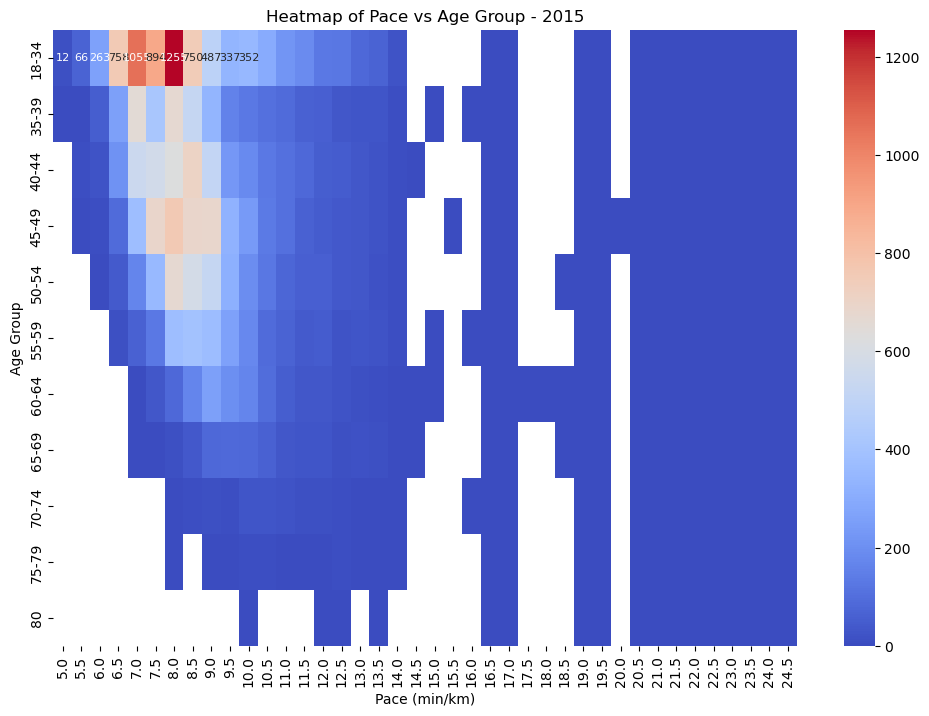

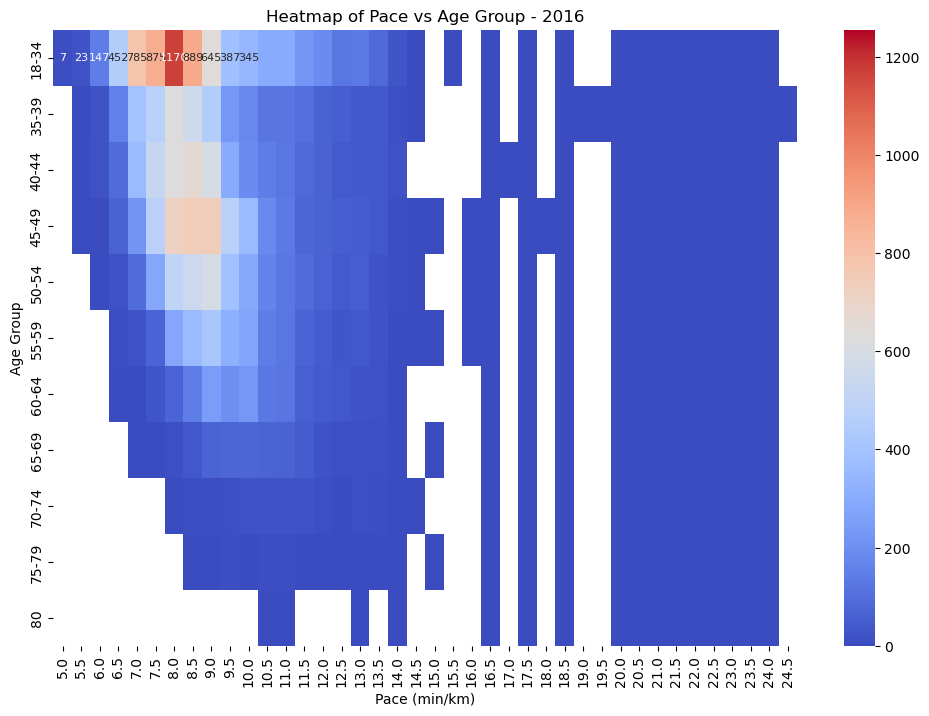

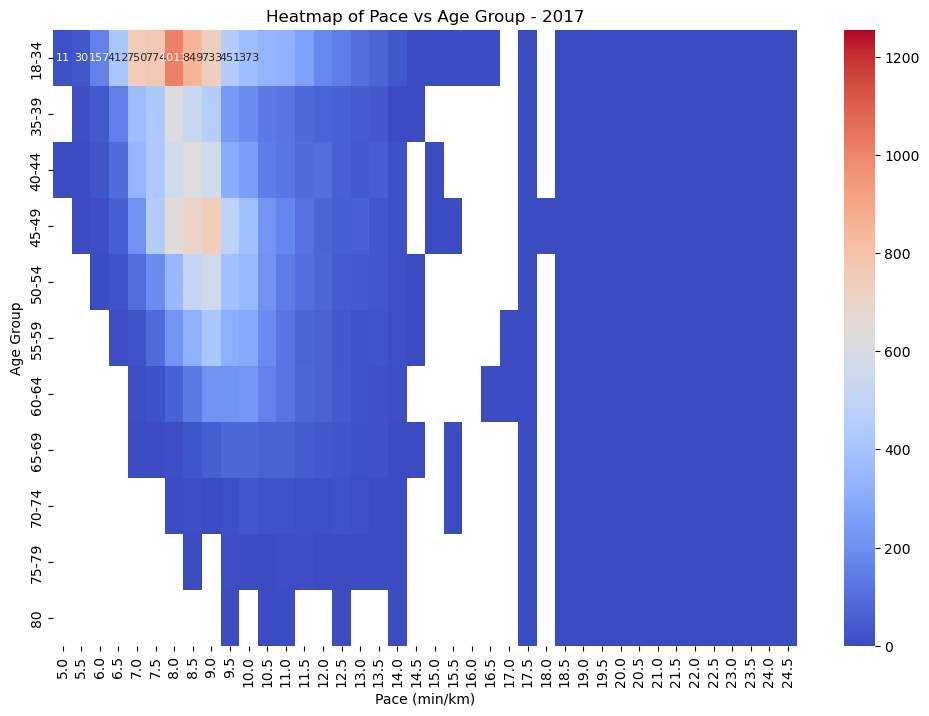

In [12]:
def prepare_pace_data(df):
    # Konvertiere die 'Pace'-Spalte in Minuten pro Kilometer
    df['Pace'] = pd.to_timedelta(df['Pace']).dt.total_seconds() / 60  # Pace in Minuten pro Kilometer

    # Runden des Pace-Werts auf die nächsten 0,5 Minuten-Schritte
    df['Pace Group'] = (df['Pace'] * 2).round() / 2
    
    return df

def create_heatmaps_for_years(df):
    # Bereite die Daten vor
    #df = prepare_pace_data(df)

    # Bestimme den gemeinsamen Pace-Gruppen-Bereich für alle Jahre
    common_pace_groups = np.arange(df['Pace Group'].min(), df['Pace Group'].max() + 0.5, 0.5)

    # Bestimme den Maximalwert für die Farbskala über alle Jahre hinweg
    max_count = 0
    for year in df['year'].unique():
        df_year = df[df['year'] == year]
        pivot_table = df_year.pivot_table(index='Age Group', columns='Pace Group', values='Name', aggfunc='count')
        max_count = max(max_count, pivot_table.max().max())

    # Erstelle Heatmaps für jedes Jahr mit denselben Pace-Gruppen und derselben Farbskala
    for year in df['year'].unique():
        df_year = df[df['year'] == year]
        
        # Pivot-Tabelle erstellen
        pivot_table = df_year.pivot_table(index='Age Group', columns='Pace Group', values='Name', aggfunc='count')
        
        # Ersetzen von NaN-Werten durch 0 und sicherstellen, dass alle Pace-Gruppen vorhanden sind
        pivot_table = pivot_table.reindex(columns=common_pace_groups, fill_value=0)
        
        # Heatmap erstellen
        plt.figure(figsize=(12, 8))
        #cmap='YlGnBu'
        sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', vmin=0, vmax=max_count,annot_kws={"size": 8})
        plt.title(f'Heatmap of Pace vs Age Group - {year}')
        plt.xlabel('Pace (min/km)')
        plt.ylabel('Age Group')
        plt.show()

# Heatmaps für die Jahre 2015, 2016 und 2017 erstellen
create_heatmaps_for_years(fulldata_concat)


## Summary 1st Question
#### From 2015 to 2017 the overall pace of the race reduced with more paces moved to range 8 - 8.5 in 2017 from 7.0 - 7.5 in 2015 for the 18 - 34 year old group. Also the pace slowed in similar fashion in the age group 45-49 from 8 - 8.5 in 2015 to 9.0 - 9.5 in 2017. At last the overall finisher times bigger than pace 16.5 increased, which can lead to different hypothesis which can not be check due to the missing information of not finished runners. one Hypothesis could be that the race got slower but increase in finishers, which could be a flow-up investigation

## 2nd Question: Which age group has the biggest difference between the 1st and the 2nd half of the marathon?

Durchschnittlicher Zeitunterschied zwischen 'Half' und 'Official Time' nach Age Group:
year            2015       2016       2017
Age Group                                 
18-34       9.670499  15.570423  16.216230
35-39       9.335201  14.907026  15.440648
40-44       9.303676  14.811746  15.709069
45-49      10.141209  15.808386  16.809603
50-54      11.024742  16.842103  18.147778
55-59      12.734395  17.812924  18.743865
60-64      14.133862  18.887930  20.887064
65-69      16.879243  20.252490  23.198885
70-74      19.988462  21.337241  26.834058
75-79      21.363596  23.021569  23.982432
80         22.803030  30.911905  29.407143


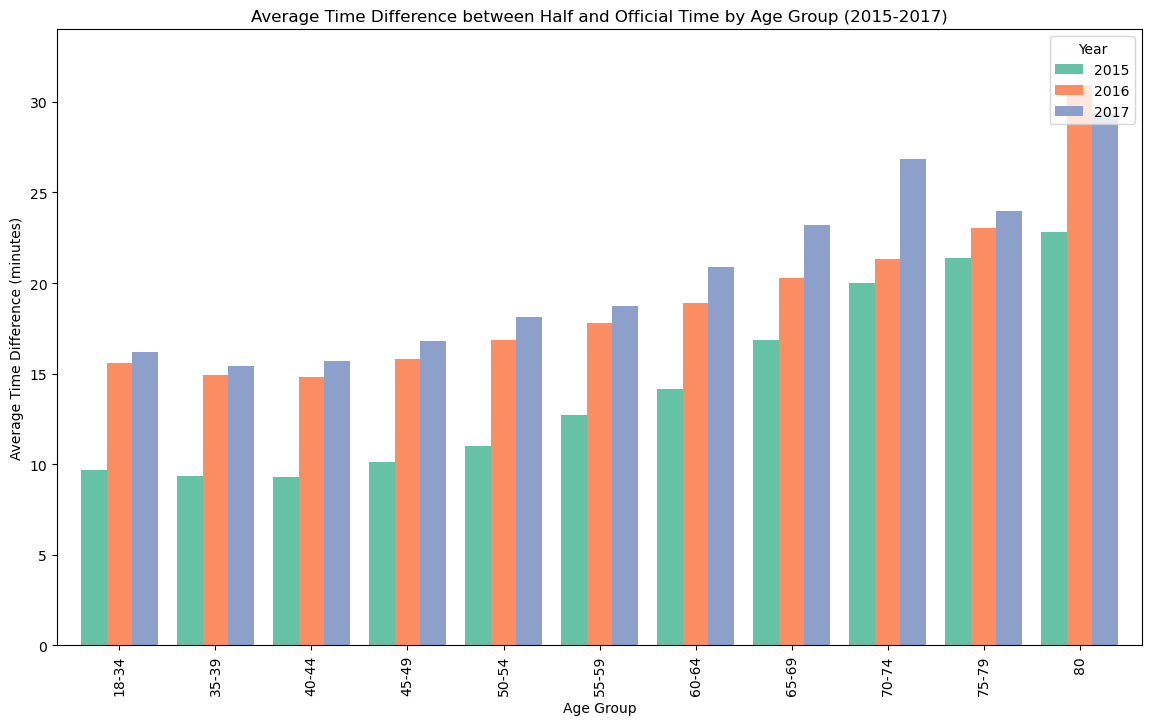

In [13]:
def analyze_time_differences_combined(df):
    # Berechne die Zeitdifferenz zwischen 'Official Time' und 'Half'
    df['Time Difference'] = df['Official Time'] - (2 * df['Half'])

    # Konvertiere die Zeitdifferenz in Minuten
    df['Time Difference'] = df['Time Difference'].dt.total_seconds() / 60
    
    # Gruppiere nach 'Age Group' und 'year' und berechne den durchschnittlichen Zeitunterschied
    avg_time_diff_by_age_group_and_year = df.groupby(['Age Group','year'])['Time Difference'].mean().unstack()

    # Zeige die Ergebnisse an
    print("Durchschnittlicher Zeitunterschied zwischen 'Half' und 'Official Time' nach Age Group:")
    print(avg_time_diff_by_age_group_and_year)

    # Erstelle ein kombiniertes Balkendiagramm mit einer dezenteren Farbpalette
    colors = sns.color_palette("Set2")  # Set2 oder Pastel1 für dezentere Farben
    avg_time_diff_by_age_group_and_year.plot(kind='bar', figsize=(14, 8), width=0.8, color=colors)
    
    plt.title('Average Time Difference between Half and Official Time by Age Group (2015-2017)')
    plt.xlabel('Age Group')
    plt.ylabel('Average Time Difference (minutes)')
    plt.ylim(0, avg_time_diff_by_age_group_and_year.max().max() * 1.1)  # Setze gleiche Y-Achse für alle Balken
    plt.legend(title='Year', loc='upper right')
    plt.show()

# Analyse der Zeitdifferenz in einem kombinierten Diagramm durchführen
analyze_time_differences_combined(fulldata_concat)


## Summary 2nd Question
#### The time differences between the first and the second half increased from 2015 to 2016 by nearly 50%. The difference between 2016 - 2017 is lesser but still there. The age group is shown by the 80+ group with 22,8 min/2015, 30.9 min/2016 and 29.4 min/2017. During investigation of the increase from 2015 to the other years, i found that in 2015 the temperature where between 44°F (7°C) and 40°F (4°C) and rainy will 2016 and 2017 the temperature have been 71°F (22 °C) and 48°F (9°C) in 2016 and 71°F (22 °C) and 42°F (6°C) in 2017. This can have a major impact on the running speed base on my on experience.

Link: https://www.cbsnews.com/boston/news/boston-marathon-weather-heat-high-temperature/ 

### 3rd Question: Can we predict the finish time by the halfway-point time?

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# short function to choose a year
def filter_data_by_year(df, year):
    return df[df['year'] == year]

# Using the numerised column M for the gender
fulldata_concat['Gender'] = fulldata_concat['M']  # 'M' Spalte wird als Gender verwendet (1 = männlich, 0 = weiblich)

# Convert 'Half' and 'Official Time' to seconds
fulldata_concat['Half'] = fulldata_concat['Half'].dt.total_seconds()
fulldata_concat['Official Time'] = fulldata_concat['Official Time'].dt.total_seconds()

# create a new dataframe only with the needed columns for the model
data = fulldata_concat[['Age', 'Gender', 'Half', 'Official Time', 'year']]

# Entferne alle Zeilen mit fehlenden Werten
#data = data.dropna()

Mean Squared Error: 480514.4012197351
R^2 Score: 0.9205127457935207


In [ ]:
# selecting the year we want to investigat
selected_year = 2015
filtered_data = filter_data_by_year(data, selected_year)

# Split into explanatory and response variables
X = filtered_data[['Age', 'Gender', 'Half']]
y = filtered_data['Official Time']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
model = RandomForestRegressor(random_state=42)
# Fit the model
model.fit(X_train, y_train)
# predict unsing my model
y_pred = model.predict(X_test)

# Socre using my model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [32]:
# copy the dataframe
results = X_test.copy()
results['Official Time'] = y_test
results['Predicted Time'] = y_pred

# Convert the times from seconds to minutes for better readability
results['Half Time (min)'] = results['Half'] / 60
results['Official Time (min)'] = results['Official Time'] / 60
results['Predicted Time (min)'] = results['Predicted Time'] / 60


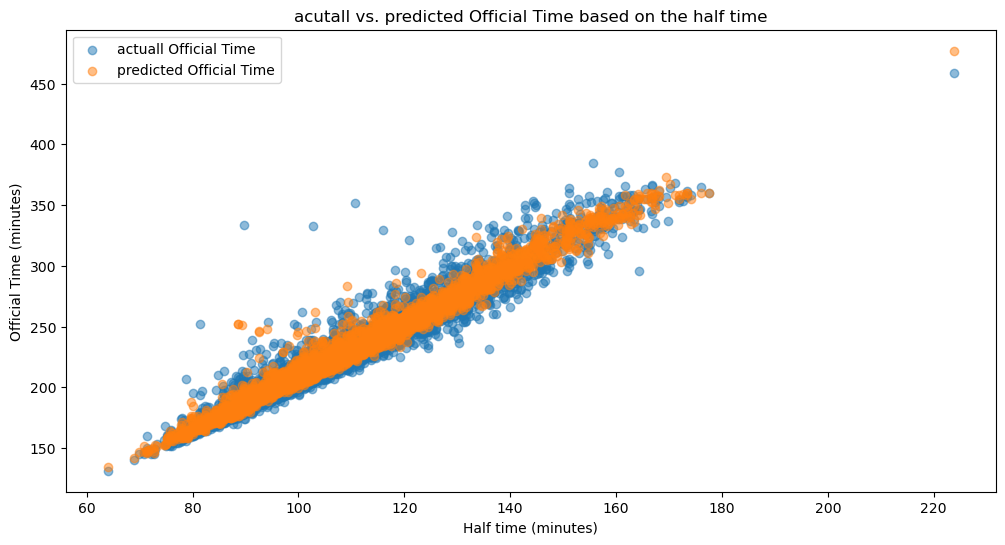

In [41]:
#Plot everything
plt.figure(figsize=(12, 6))
plt.scatter(results['Half Time (min)'], results['Official Time (min)'], label='actuall Official Time', alpha=0.5)
plt.scatter(results['Half Time (min)'], results['Predicted Time (min)'], label='predicted Official Time', alpha=0.5)
plt.xlabel('Half time (minutes)')
plt.ylabel('Official Time (minutes)')
plt.title('acutall vs. predicted Official Time based on the half time')
plt.legend()
plt.show()


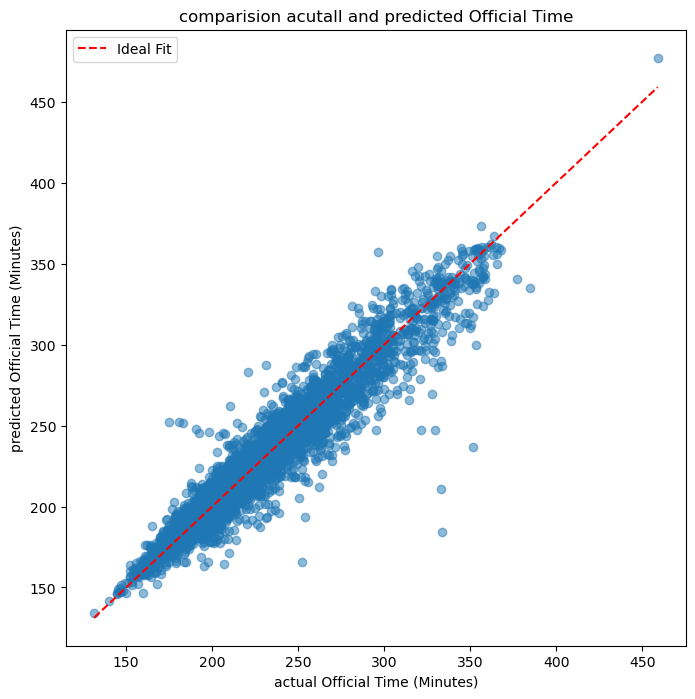

In [42]:
plt.figure(figsize=(8, 8))
plt.scatter(results['Official Time (min)'], results['Predicted Time (min)'], alpha=0.5)
plt.plot([results['Official Time (min)'].min(), results['Official Time (min)'].max()],
         [results['Official Time (min)'].min(), results['Official Time (min)'].max()],
         'r--', label='Ideal Fit')
plt.xlabel('actual Official Time (Minutes)')
plt.ylabel('predicted Official Time (Minutes)')
plt.title('comparision acutall and predicted Official Time')
plt.legend()
plt.show()


C:\Users\Z568164\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


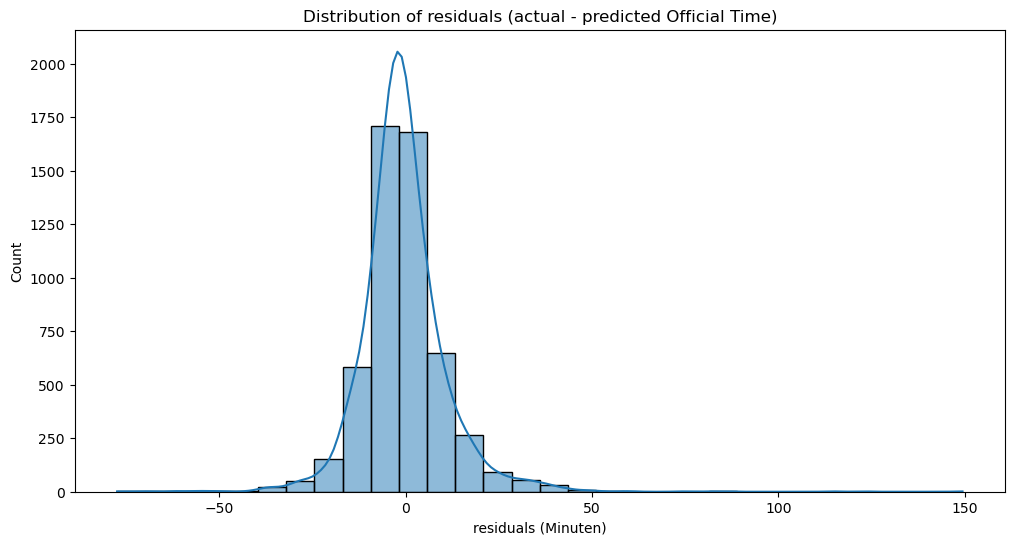

In [43]:
# Calculate the residuals
results['Residuals'] = results['Official Time (min)'] - results['Predicted Time (min)']

plt.figure(figsize=(12, 6))
sns.histplot(results['Residuals'], bins=30, kde=True)
plt.xlabel('residuals (Minuten)')
plt.title('Distribution of residuals (actual - predicted Official Time)')
plt.show()


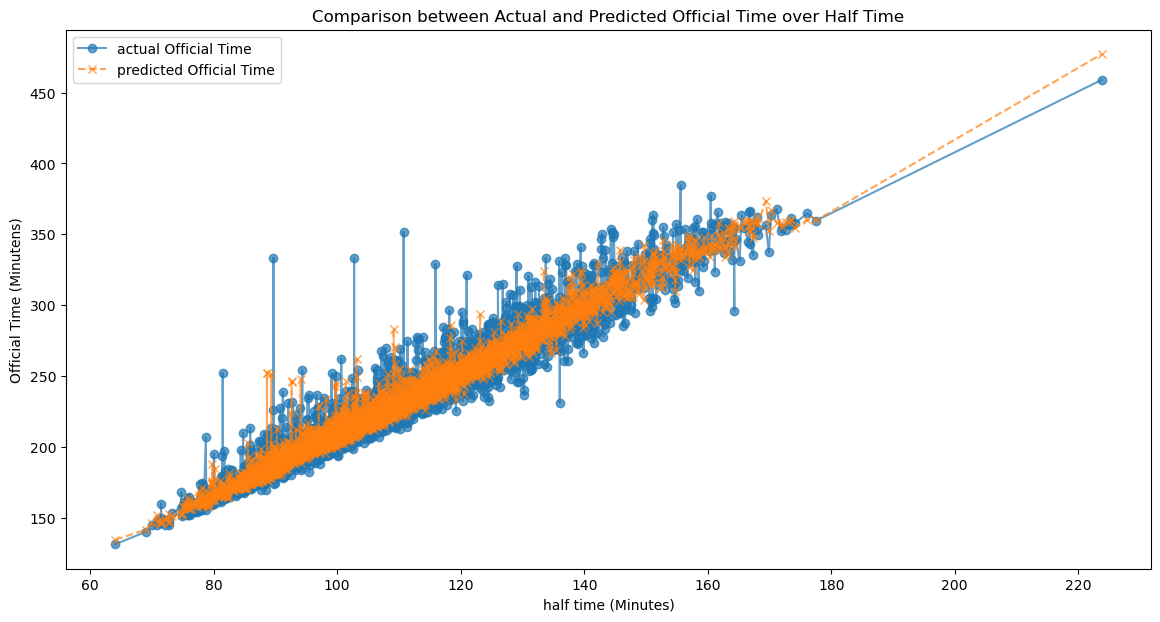

In [48]:
# Sortiere die Ergebnisse nach 'Half Time' für eine bessere Visualisierung
results_sorted = results.sort_values('Half Time (min)')

plt.figure(figsize=(14, 7))
plt.plot(results_sorted['Half Time (min)'], results_sorted['Official Time (min)'], label='actual Official Time', marker='o', linestyle='-', alpha=0.7)
plt.plot(results_sorted['Half Time (min)'], results_sorted['Predicted Time (min)'], label='predicted Official Time', marker='x', linestyle='--', alpha=0.7)
plt.xlabel('half time (Minutes)')
plt.ylabel('Official Time (Minutens)')
plt.title('Comparison between Actual and Predicted Official Time over Half Time')
plt.legend()
plt.show()


### My one result from the 2023 franconian switzerland half-marathon:
M35	 	2:27:47	

In [50]:
# Using my results for prediciton
example = pd.DataFrame({
    'Age': [36], 
    'Gender': [1], 
    'Half': ['02:27:47']  # Zeit als String
})

# convert time intot total seconds
example['Half'] = pd.to_timedelta(example['Half']).dt.total_seconds()

# predict
predicted_time = model.predict(example)

# convert results back in hours, minutes, seconds
predicted_time_formatted = pd.to_timedelta(predicted_time, unit='s').round('s')

# same lamda function as bevor to make it pretty
predicted_time_str = predicted_time_formatted.components.apply(
    lambda x: f"{int(x.hours):02d}:{int(x.minutes):02d}:{int(x.seconds):02d}", axis=1
)

# print the prediction
print(f'Predicted Official Time: {predicted_time_str[0]}')


Predicted Official Time: 05:22:56


## Summary 3rd Question
#### The random forest model I used is quite good in predicting the finish time base on the half marathon time with r^2-score of 0.9205127457935207. With the mean squared error of 480514.4012197351 the model shows that there are some have outliers/unexpected behavior. With the model predicted marathon finish times, and based on the results of the 2nd question that the second half of slower than the first half the model results are really good. The outliers in the data for the high mean squared error are based on actual value which is natural to sport events,espacily long running events where the drop out rate and the slowing down rate increases over time. This can either be due to special occurences, wrong paceing strategie, wrong perparation or even wrong equipment (more information here: https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2023.1273451/full) Additionally I used my own time for the franconian switzerland half-marathon in 2023 to predict my time for the boston marathon => 05.22.56 hours.